## Optimal learning rate

In [1]:
import numpy as np
import matplotlib.pylab as plt

A implementation of gradient descent for 2D quadratic functions of the form $J(\theta) = \frac{1}{2} \theta^T A \theta + B \theta + C$, where $A$ is a $2x2$ symmetric positive-definite matrix, $B$ is a $2$-dimensional vector, and $C$ is a number. By default, the learning rate $\alpha$ is computed automatically at each step to minimize the cost function along the gradient step: $J(\theta-\alpha\nabla J)$. It can be shown that this value is given by $\alpha=\frac{(\nabla J)^T(\nabla J)}{(\nabla J)^TA(\nabla J)}$. (See lecture notes for details.)

In [2]:
class GradientDescent:
    def __init__(self, A, B, C, theta0):
        """Gradient descent for 2D quadratic functions.

        The cost function is assumed to be of the form:
        J(theta) = 1/2 theta^T A theta + B theta + C, where
        A is a 2x2 symmetric positive-definite matrix,
        B is a 2-dimensional vector and C is a number.
        All methods generalize to higher dimensions than 2
        except for `plot`.

        Args:
            A (numpy.ndarray): 2x2 symmetric positive-definite array.
            B (numpy.ndarray): 2x1 array.
            C (float): any number.
            theta0 (numpy.ndarray): starting point.
        """
        self.A = A
        self.B = B
        self.C = C
        self.theta0 = theta0

    def cost(self, theta):
        """Computes the cost function.
        
        Args:
            theta (numpy.ndarray): 2x1 array.
        
        Returns:
            float: J(theta).
        """
        return 0.5*theta.T.dot(self.A).dot(theta) + theta.T.dot(self.B) + C
    
    def cost_grad(self, theta):
        """Computes the cost function gradient.
        
        Args:
            theta (numpy.ndarray): 2x1 array.
        
        Returns:
            numpy.ndarray: gradient as 2x1 array.
        """
        return self.A.dot(theta) + self.B
    
    def alpha_opt(self, theta):
        """Computes learning rate which minimizes the cost function
        along the gradient step. This is given by:
        [(\nabla J)^T(\nabla J)]/[(\nabla J)^T A (\nabla J)].
        
        Args:
            theta (numpy.ndarray): 2x1 array.
        
        Returns:
            float: J(theta).
        """
        cost_g = self.cost_grad(theta)
        return (cost_g.T.dot(cost_g)/(cost_g.T.dot(self.A).dot(cost_g))).item()
        
    def run(self, max_iter, alpha=None):
        """Runs gradient descent.

        Args:
            max_iter (int): max number of iterations.
            alpha (float): learning rate. If not specified, `alpha_opt`
                is used by default.

        Returns:
            list of numpy.ndarray: list of all thetas from start to end.
        """        
        theta = self.theta0
        thetas = [self.theta0]

        iter_ = 1 # variable to keep track of number of iteration
        while iter_ <= max_iter:
            # Gradient descent update
            theta = theta - (self.alpha_opt(theta) if alpha is None else alpha) * self.cost_grad(theta)

            # Update number of iterations
            iter_ = iter_ + 1
            thetas.append(theta)

        return thetas

    
    def plot(self, runs, min_x, max_x, min_y, max_y, save_to):
        """Plots function and gradient descent steps as arrows.

        Args:
            runs (list of dict): each item is a dictionary with two
                keys: 'steps', whose corresponding value contains the
                steps taken during gradient descent (return from `run`)
                and 'color', whose value describes the color of arrows.
            min_x (float): min x-value for plot.
            max_x (float): max x-value for plot.
            min_y (float): min y-value for plot.
            max_y (float): max y-value for plot.
            save_to (str): path to save plot to.
        """
        plt.clf()

        # Plot contours of 2D function
        theta1, theta2 = np.meshgrid(
            np.linspace(min_x, max_x, 100),
            np.linspace(min_y, max_y, 100)
        )
        # Apply function to grid points
        func_grid = np.array(
            [self.cost(np.array(c)) for c in zip(theta1.flat, theta2.flat)]
        ).reshape(theta1.shape)
        # Plot contours
        cs = plt.contour(theta1, theta2, func_grid, 10)

        # Plot starting point
        plt.plot(*self.theta0, color='r', marker='o', markersize=6)

        # Plot gradient descent steps as arrow
        for run in runs:
            steps = run['steps']
            for (start, end) in zip(steps[:-1], steps[1:]):
                arrow = np.concatenate([start, end - start])
                plt.quiver(
                    *arrow,
                    color=run['color'],
                    angles='xy',
                    scale_units='xy',
                    scale=1
                )

        # Plot the minimum of the cost function.
        min_theta = -np.linalg.inv(self.A).dot(self.B)
        plt.plot(*min_theta, color='g', marker='o', markersize=6)

        # Save plot
        plt.clabel(cs, inline=1, fontsize=10, fmt='%1.1f')
        plt.hlines(0, min_x, max_x, color='k', linestyle='--')
        plt.vlines(0, min_y, max_y, color='k', linestyle='--')
        plt.legend()
        plt.xlabel(r'$\theta_1$')
        plt.ylabel(r'$\theta_2$')
        plt.savefig(save_to)

Let's start with $A = \begin{pmatrix}2 & 1\\1 & 1\end{pmatrix}$, $B=\begin{pmatrix}1\\1\end{pmatrix}$, $C=-3$. We will initialize $\theta$ at $\begin{pmatrix}1\\1\end{pmatrix}$. Below the red arrows show gradient descent steps when the *optimal* $\alpha$ is used. Gradient descent is able to find the minimum after about only 5 steps. The black arrows correspond to using a constant learning rate $0.2$. After 10 seps, it still has quite a way to go, and progress will be slow since the gradient is getting smaller (arrows are shrinking). 

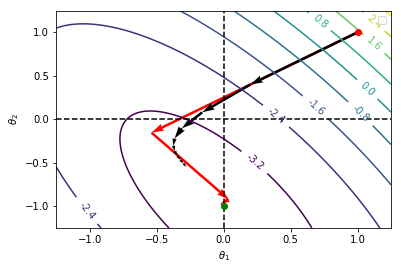

In [3]:
A = np.array([[2., 1.], [1, 1.]])
B = np.array([[1., 1.]]).T
C = -3.0
theta_start1 = np.array([[1, 1.]]).T

gd1 = GradientDescent(A, B, C, theta_start1)
opt_steps1 = gd1.run(5)
cons_steps1 = gd1.run(10, 0.2)
gd1.plot([{'steps': opt_steps1, 'color': 'r'}, {'steps': cons_steps1, 'color': 'k'}], -1.25, 1.25, -1.25, 1.25, 'opt_alpha.pdf')

If $\nabla J$ is along one of the eigenvectors of $A$ at the starting point, gradient descent finds the minimum after only one step. Below we diagonalize $A$, pick one of its eigenvectors $v$, and reverse engineer a starting point so that $\nabla J=A\theta+B=v$, or equivalently $\theta=A^{-1}(v-B)$.

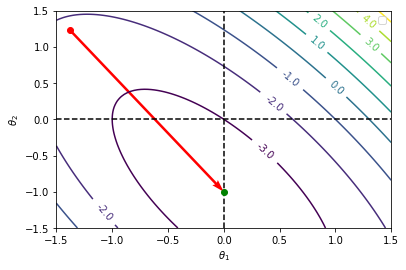

In [4]:
eigvals, eigvecs = np.linalg.eig(A)
theta_start2 = np.linalg.inv(A).dot(eigvecs[:,[1]] - B)
gd2 = GradientDescent(A, B, C, theta_start2)
opt_steps2 = gd2.run(1)
gd2.plot([{'steps': opt_steps2, 'color': 'r'}], -1.5, 1.5, -1.5, 1.5, 'opt_alpha_eig.pdf')

We've been using the word *optimal* a bit too loosely. There are situations where choosing the learning rate in this manner is not terribly efficient. Below is an example where $A = \begin{pmatrix}16 & 0\\0 & 1\end{pmatrix}$ and $B=C=0$. In this case the gradient is a lot larger in the $\theta_1$ direction. Starting at $\begin{pmatrix}1 \\16\end{pmatrix}$, gradient descent zig-zags itself down towards the minimum, spending a lot of time moving horizontally. In general, we can avoid situations by using feature scaling.

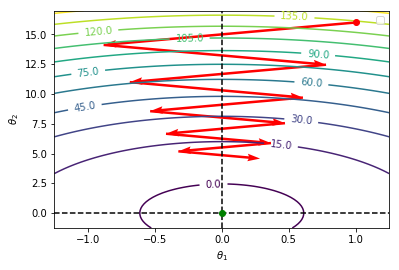

In [5]:
theta_start3 = np.array([[1., 16.]]).T

gd3 = GradientDescent(
    np.array([[16., 0.], [0., 1.]]),
    np.zeros((2, 1)),
    0.0,
    theta_start3
)
opt_steps3 = gd3.run(10)
gd3.plot([{'steps': opt_steps3, 'color': 'r'}], -1.25, 1.25, -1.25, 17, 'opt_alpha_zz.pdf')